In [ ]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("raw_data/dataset1.csv")
df.head()

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,30/12/2017 18:37,16.000000,rat,30/12/2017 18:35,30/12/2017 18:38,108,1,0,0,30/12/2017 16:45,1.870833,0
1,30/12/2017 19:51,0.074016,fast,30/12/2017 19:50,30/12/2017 19:55,17,0,1,0,30/12/2017 16:45,3.100833,0
2,30/12/2017 19:51,4.000000,fast,30/12/2017 19:50,30/12/2017 19:55,41,0,1,0,30/12/2017 16:45,3.107500,0
3,30/12/2017 19:52,10.000000,rat,30/12/2017 19:50,30/12/2017 19:55,111,1,0,0,30/12/2017 16:45,3.126944,0
4,30/12/2017 19:54,15.000000,rat,30/12/2017 19:50,30/12/2017 19:55,194,1,0,0,30/12/2017 16:45,3.150000,0


In [7]:
print(df.dtypes)

start_time                    object
bat_landing_to_food          float64
habit                         object
rat_period_start              object
rat_period_end                object
seconds_after_rat_arrival      int64
risk                           int64
reward                         int64
month                          int64
sunset_time                   object
hours_after_sunset           float64
season                         int64
dtype: object


In [9]:
print(df.describe())

       bat_landing_to_food  seconds_after_rat_arrival        risk      reward  \
count           907.000000                 907.000000  907.000000  907.000000   
mean             11.713134                 282.877619    0.495039    0.533627   
std              27.644410                 240.974918    0.500251    0.499143   
min               0.010238                   0.000000    0.000000    0.000000   
25%               1.000000                  89.500000    0.000000    0.000000   
50%               4.000000                 206.000000    0.000000    1.000000   
75%              11.500000                 446.500000    1.000000    1.000000   
max             443.000000                 949.000000    1.000000    1.000000   

            month  hours_after_sunset      season  
count  907.000000          907.000000  907.000000  
mean     3.800441            5.531863    0.833517  
std      1.199190            2.414146    0.372719  
min      0.000000           -0.261667    0.000000  
25%      4

In [10]:
# Remove Duplicate rows
df = df.drop_duplicates()

In [11]:
# Check Missing Values
print(df.isnull().sum())

start_time                    0
bat_landing_to_food           0
habit                        41
rat_period_start              0
rat_period_end                0
seconds_after_rat_arrival     0
risk                          0
reward                        0
month                         0
sunset_time                   0
hours_after_sunset            0
season                        0
dtype: int64


In [12]:
df['habit'].unique()

array(['rat', 'fast', 'pick', 'bat_fight', 'rat_and_no_food', nan,
       'rat_and_others', 'pick_and_others', 'gaze', 'pick_rat', 'bat',
       'both', 'pick_bat',
       '94.0,305.0,239.0,416.0; 364.8,139.3,462.3,241.3', 'rat attack',
       'attack_rat', 'bat_and_rat', 'rat_attack', 'other_bats',
       'rat_pick', 'rat_and_bat', 'bowl_out', 'other_bat',
       '373.0,80.0,504.0,148.0; 274.6,110.7,382.4,267.3', 'other',
       '245.6,179.5,321.4,314.0; 522.4,0.3,592.0,95.5', 'eating',
       'rat_to_bat', 'other_bats/rat',
       '405.6,112.3,513.1,215.4; 464.1,197.7,614.9,334.3; 511.5,301.1,639.4,388.9',
       'pick_and_all', 'bat_and_pick', 'bat_fight_and_pick',
       '187.0,152.0,304.0,240.0; 567.9,88.6,621.1,140.3',
       '44.0,77.0,157.0,240.0; 253.0,96.0,346.0,147.0',
       '397.7,159.7,580.2,330.5; 252.0,92.0,346.0,149.0', 'pick_and_bat',
       '218.0,171.0,381.0,269.0; 239.0,106.0,315.0,155.0',
       '423.0,155.9,535.6,370.9; 238.0,99.0,314.0,160.0',
       'eating_and

In [13]:
# Parse datetimes
dt_cols = ['start_time', 'rat_period_start', 'rat_period_end', 'sunset_time']
for c in dt_cols:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors='coerce', dayfirst=True)

In [14]:
# Coerce numerics
for c in ['bat_landing_to_food', 'seconds_after_rat_arrival', 'hours_after_sunset']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

In [15]:

# Binary flags to Int64 (nullable)
for c in ['risk', 'reward']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce').astype('Int64')

In [18]:
# Check for negative values in each column
negative_check = (df['seconds_after_rat_arrival'] < 0).any()
negative_check

np.False_

In [21]:
def clean_habit(habit):
    if pd.isna(habit) or str(habit).strip() == "":
        return "Unknown"
    
    h = str(habit).lower().strip()
    
    # Remove coordinate-like or numeric only values
    if re.fullmatch(r"[0-9\.\,\s]+", h):
        return "Unknown"
    
    # Synonym unification
    h = h.replace("bats", "bat").replace("pick_and_bat", "pick_bat").replace("rat_and_pick", "rat_pick")
    
    return h

df["habit"] = df["habit"].apply(clean_habit)

# Consolidate rare categories
freq = df["habit"].value_counts()
rare = freq[freq < 10].index
df["habit"] = df["habit"].replace(rare, "Other")

# Final small interpretable set
print("Unique habits after cleaning:", df["habit"].unique())

Unique habits after cleaning: ['rat' 'fast' 'pick' 'bat_fight' 'Other' 'Unknown' 'bat' 'pick_bat'
 'bat_and_rat' 'rat_pick' 'rat_and_bat' 'bat_and_pick']


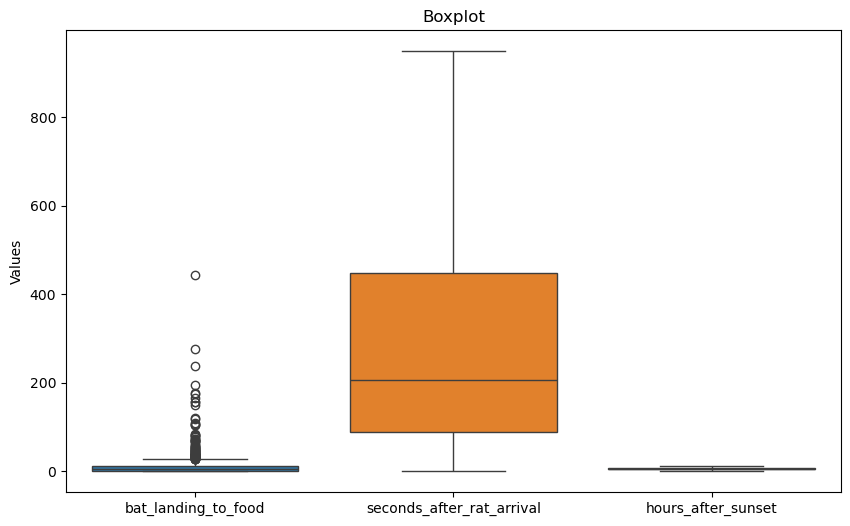

In [25]:
# Visulaize Outliners

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['bat_landing_to_food', 'seconds_after_rat_arrival', 'hours_after_sunset']])

# Add labels and title
plt.title('Boxplot')
plt.ylabel('Values')
plt.show()

In [26]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers, lower_bound, upper_bound

# Example: Detect outliers in 'col1'
outliers_col1, lower_bound, upper_bound = detect_outliers_iqr(df, 'bat_landing_to_food')

In [27]:
sorted(list(outliers_col1['bat_landing_to_food']), reverse=True)

[443.0,
 275.0,
 237.0,
 195.0,
 176.0,
 174.0,
 164.0,
 155.0,
 155.0,
 150.0,
 120.0,
 118.0,
 109.0,
 106.0,
 105.0,
 104.0,
 83.0,
 82.0,
 81.0,
 80.0,
 76.0,
 73.0,
 72.0,
 71.0,
 68.0,
 67.0,
 67.0,
 65.0,
 61.0,
 59.0,
 56.0,
 55.0,
 54.0,
 54.0,
 52.0,
 50.0,
 50.0,
 50.0,
 48.0,
 47.0,
 46.0,
 46.0,
 45.0,
 44.0,
 43.0,
 42.0,
 41.0,
 40.0,
 39.0,
 39.0,
 39.0,
 38.0,
 37.0,
 37.0,
 37.0,
 36.0,
 36.0,
 36.0,
 36.0,
 35.0,
 35.0,
 35.0,
 34.0,
 34.0,
 34.0,
 33.0,
 33.0,
 32.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 30.0,
 30.0,
 30.0,
 30.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0]

In [28]:
upper_limit = df["bat_landing_to_food"].quantile(0.99)
print(upper_limit)

# Cap values in 'bat_landing_to_food' column that are above the upper bound limit
df['bat_landing_to_food'] = df['bat_landing_to_food'].apply(lambda x: min(x, upper_limit))

148.50000000000136


In [29]:
# Create 30-min period key by flooring start_time
df = df.loc[df['start_time'].notna()].copy()
df['period_time'] = df['start_time'].dt.floor('30min')

In [31]:
df.to_csv("cleaned_data/dataset1_clean.csv")